## Importing Data From SQLite Data Base

In [324]:
from sqlalchemy import create_engine

In [325]:
engine = create_engine("sqlite:///mta_data.db")

In [326]:
engine.table_names()

<ipython-input-326-d72bc75a6b62>:1: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  engine.table_names()


['mta_data']

## Importing Necessary Python Packages

In [327]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Creating Pandas Data Frame From Sqlite database

In [328]:
df = pd.read_sql('SELECT * FROM mta_data WHERE LINENAME = "L";', engine)

In [329]:
df.dtypes

C/A         object
UNIT        object
SCP         object
STATION     object
LINENAME    object
DIVISION    object
DATE        object
TIME        object
DESC        object
ENTRIES      int64
EXITS        int64
dtype: object

In [330]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 652354 entries, 0 to 652353
Data columns (total 11 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   C/A       652354 non-null  object
 1   UNIT      652354 non-null  object
 2   SCP       652354 non-null  object
 3   STATION   652354 non-null  object
 4   LINENAME  652354 non-null  object
 5   DIVISION  652354 non-null  object
 6   DATE      652354 non-null  object
 7   TIME      652354 non-null  object
 8   DESC      652354 non-null  object
 9   ENTRIES   652354 non-null  int64 
 10  EXITS     652354 non-null  int64 
dtypes: int64(2), object(9)
memory usage: 54.7+ MB


## Data Cleaning and Subsetting 

In [331]:
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,H005,R330,00-00-00,3 AV,L,BMT,08/07/2021,00:00:00,REGULAR,3411606,9713217
1,H005,R330,00-00-00,3 AV,L,BMT,08/07/2021,04:00:00,REGULAR,3411617,9713367
2,H005,R330,00-00-00,3 AV,L,BMT,08/07/2021,08:00:00,REGULAR,3411619,9713437
3,H005,R330,00-00-00,3 AV,L,BMT,08/07/2021,12:00:00,REGULAR,3411634,9713667
4,H005,R330,00-00-00,3 AV,L,BMT,08/07/2021,16:00:00,REGULAR,3411675,9714049


In [332]:
df.columns.values

array(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE',
       'TIME', 'DESC', 'ENTRIES', 'EXITS'], dtype=object)

In [333]:
df["DATETIME"] = pd.to_datetime(df.DATE + " " +df.TIME, format="%m/%d/%Y %H:%M:%S")

In [334]:
df["MONTH"] = df.DATETIME.dt.month
df["YEAR"] = df.DATETIME.dt.year
df["WEEK"] = df.DATETIME.dt.week
df["MONTHYEAR"] = pd.to_datetime(df["DATETIME"]).dt.to_period('M')

<ipython-input-334-f5fc4b9bf950>:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df["WEEK"] = df.DATETIME.dt.week


In [335]:
df.YEAR.value_counts()

2020    253279
2019    224426
2021    172831
2018      1818
Name: YEAR, dtype: int64

In [336]:
df.WEEK.value_counts()

22    14858
27    14645
29    14632
20    14542
28    14522
25    14519
21    14518
30    14492
31    14483
26    14481
24    14469
23    14400
18    14234
19    14223
17    14212
15    14020
7     13980
16    13973
6     13967
5     13959
2     13911
12    13873
1     13830
8     13823
3     13820
13    13772
11    13713
9     13710
4     13647
14    13625
10    13613
32    13226
52    11081
48    10266
40    10257
44     9988
43     9936
51     9894
45     9811
42     9787
50     9760
41     9737
49     9672
47     9605
46     9589
39     9588
37     9550
34     9386
38     9385
33     9381
36     9346
35     9285
53     5358
Name: WEEK, dtype: int64

In [337]:
df.STATION.value_counts()

1 AV               96396
BEDFORD AV         79282
CANARSIE-ROCKAW    65402
HALSEY ST          46135
DEKALB AV          35313
GRAHAM AV          35220
MORGAN AV          35014
3 AV               34614
GRAND ST           34598
JEFFERSON ST       29068
WILSON AV          28820
LIVONIA AV         28797
EAST 105 ST        23054
MONTROSE AV        17440
BUSHWICK AV        17305
ATLANTIC AV        17263
NEW LOTS           17124
SUTTER AV          11509
Name: STATION, dtype: int64

In [338]:
df.tail()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME,MONTH,YEAR,WEEK,MONTHYEAR
652349,H041,R152,00-06-01,CANARSIE-ROCKAW,L,BMT,01/04/2019,04:00:00,REGULAR,6270762,431362,2019-01-04 04:00:00,1,2019,1,2019-01
652350,H041,R152,00-06-01,CANARSIE-ROCKAW,L,BMT,01/04/2019,08:00:00,REGULAR,6271236,431362,2019-01-04 08:00:00,1,2019,1,2019-01
652351,H041,R152,00-06-01,CANARSIE-ROCKAW,L,BMT,01/04/2019,12:00:00,REGULAR,6271687,431366,2019-01-04 12:00:00,1,2019,1,2019-01
652352,H041,R152,00-06-01,CANARSIE-ROCKAW,L,BMT,01/04/2019,16:00:00,REGULAR,6271952,431367,2019-01-04 16:00:00,1,2019,1,2019-01
652353,H041,R152,00-06-01,CANARSIE-ROCKAW,L,BMT,01/04/2019,20:00:00,REGULAR,6272232,431373,2019-01-04 20:00:00,1,2019,1,2019-01


## Removing Duplicates

In [339]:
(df.groupby(["C/A", "UNIT", "SCP", "STATION", "DATETIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(20)

,C/A,UNIT,SCP,STATION,DATETIME,ENTRIES
182912,H009,R235,00-06-00,BEDFORD AV,2020-08-13 00:00:00,2
182913,H009,R235,00-06-00,BEDFORD AV,2020-08-13 04:00:00,2
550514,H039,R375,00-00-00,NEW LOTS,2020-09-22 05:00:00,2
186637,H009,R235,00-06-01,BEDFORD AV,2020-08-12 20:00:00,2
553971,H039,R375,00-00-01,NEW LOTS,2019-09-13 05:00:00,2
182906,H009,R235,00-06-00,BEDFORD AV,2020-08-12 12:00:00,2
182907,H009,R235,00-06-00,BEDFORD AV,2020-08-12 16:00:00,2
182908,H009,R235,00-06-00,BEDFORD AV,2020-08-12 20:00:00,2
186636,H009,R235,00-06-01,BEDFORD AV,2020-08-12 16:00:00,2
151555,H009,R235,00-03-00,BEDFORD AV,2020-03-22 12:00:00,2


In [340]:
df.sort_values(["C/A", "UNIT", "SCP", "STATION", "DATETIME"], 
                          inplace=True, ascending=False)
df.drop_duplicates(subset=["C/A", "UNIT", "SCP", "STATION", "DATETIME"], inplace=True)

In [341]:
(df.groupby(["C/A", "UNIT", "SCP", "STATION", "DATETIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(20)

,C/A,UNIT,SCP,STATION,DATETIME,ENTRIES
0,H005,R330,00-00-00,3 AV,2018-12-29 03:00:00,1
434894,H030,R266,01-00-01,HALSEY ST,2020-07-08 12:00:00,1
434887,H030,R266,01-00-01,HALSEY ST,2020-07-07 08:00:00,1
434888,H030,R266,01-00-01,HALSEY ST,2020-07-07 12:00:00,1
434889,H030,R266,01-00-01,HALSEY ST,2020-07-07 16:00:00,1
434890,H030,R266,01-00-01,HALSEY ST,2020-07-07 20:00:00,1
434891,H030,R266,01-00-01,HALSEY ST,2020-07-08 00:00:00,1
434892,H030,R266,01-00-01,HALSEY ST,2020-07-08 04:00:00,1
434893,H030,R266,01-00-01,HALSEY ST,2020-07-08 08:00:00,1
434895,H030,R266,01-00-01,HALSEY ST,2020-07-08 16:00:00,1


In [342]:
df['WEEKDAY'] = df['DATETIME'].dt.day_name()

In [343]:
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME,MONTH,YEAR,WEEK,MONTHYEAR,WEEKDAY
5375,H041,R152,00-06-01,CANARSIE-ROCKAW,L,BMT,08/13/2021,21:00:00,REGULAR,6565955,436648,2021-08-13 21:00:00,8,2021,32,2021-08,Friday
5374,H041,R152,00-06-01,CANARSIE-ROCKAW,L,BMT,08/13/2021,17:00:00,REGULAR,6565929,436648,2021-08-13 17:00:00,8,2021,32,2021-08,Friday
5373,H041,R152,00-06-01,CANARSIE-ROCKAW,L,BMT,08/13/2021,13:00:00,REGULAR,6565902,436648,2021-08-13 13:00:00,8,2021,32,2021-08,Friday
5372,H041,R152,00-06-01,CANARSIE-ROCKAW,L,BMT,08/13/2021,09:00:00,REGULAR,6565879,436648,2021-08-13 09:00:00,8,2021,32,2021-08,Friday
5371,H041,R152,00-06-01,CANARSIE-ROCKAW,L,BMT,08/13/2021,05:00:00,REGULAR,6565833,436648,2021-08-13 05:00:00,8,2021,32,2021-08,Friday


In [344]:
Station_Entries = df.groupby(["YEAR"]).ENTRIES.mean()
Station_Entries

YEAR
2018    5.532431e+07
2019    4.072397e+07
2020    3.195036e+07
2021    4.590214e+07
Name: ENTRIES, dtype: float64

In [345]:
turnstiles_daily = (df.groupby(["C/A", "UNIT", "SCP", "STATION", "DATE", "MONTHYEAR","MONTH","YEAR","WEEK","WEEKDAY"],as_index=False).ENTRIES.first())

In [346]:
turnstiles_daily.head(20)

,C/A,UNIT,SCP,STATION,DATE,MONTHYEAR,MONTH,YEAR,WEEK,WEEKDAY,ENTRIES
0,H005,R330,00-00-00,3 AV,01/01/2019,2019-01,1,2019,1,Tuesday,3119999
1,H005,R330,00-00-00,3 AV,01/01/2020,2020-01,1,2020,1,Wednesday,3299691
2,H005,R330,00-00-00,3 AV,01/01/2021,2021-01,1,2021,53,Friday,3374127
3,H005,R330,00-00-00,3 AV,01/02/2019,2019-01,1,2019,1,Wednesday,3120623
4,H005,R330,00-00-00,3 AV,01/02/2020,2020-01,1,2020,1,Thursday,3300225
5,H005,R330,00-00-00,3 AV,01/02/2021,2021-01,1,2021,53,Saturday,3374184
6,H005,R330,00-00-00,3 AV,01/03/2019,2019-01,1,2019,1,Thursday,3121331
7,H005,R330,00-00-00,3 AV,01/03/2020,2020-01,1,2020,1,Friday,3300853
8,H005,R330,00-00-00,3 AV,01/03/2021,2021-01,1,2021,53,Sunday,3374240
9,H005,R330,00-00-00,3 AV,01/04/2019,2019-01,1,2019,1,Friday,3122001


In [347]:
## Removing 2018 data and Unfinished August Data from Data Set

In [348]:
turnstiles_daily = turnstiles_daily[(turnstiles_daily.MONTHYEAR != "2018-12")] 
turnstiles_daily = turnstiles_daily[(turnstiles_daily.MONTHYEAR != "2021-08")] 

In [349]:
turnstiles_daily[["PREV_DATE", "PREV_ENTRIES"]] = (turnstiles_daily
                                                       .groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"]
                                                       .apply(lambda grp: grp.shift(1)))

<ipython-input-349-3a945374269e>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  turnstiles_daily[["PREV_DATE", "PREV_ENTRIES"]] = (turnstiles_daily


In [350]:
turnstiles_daily.dropna(subset=["PREV_DATE"], axis=0, inplace=True)

In [351]:
turnstiles_daily[turnstiles_daily["ENTRIES"] < turnstiles_daily["PREV_ENTRIES"]].head()

,C/A,UNIT,SCP,STATION,DATE,MONTHYEAR,MONTH,YEAR,WEEK,WEEKDAY,ENTRIES,PREV_DATE,PREV_ENTRIES
3,H005,R330,00-00-00,3 AV,01/02/2019,2019-01,1,2019,1,Wednesday,3120623,01/01/2021,3374127.0
6,H005,R330,00-00-00,3 AV,01/03/2019,2019-01,1,2019,1,Thursday,3121331,01/02/2021,3374184.0
9,H005,R330,00-00-00,3 AV,01/04/2019,2019-01,1,2019,1,Friday,3122001,01/03/2021,3374240.0
12,H005,R330,00-00-00,3 AV,01/05/2019,2019-01,1,2019,1,Saturday,3122411,01/04/2021,3374404.0
15,H005,R330,00-00-00,3 AV,01/06/2019,2019-01,1,2019,1,Sunday,3122747,01/05/2021,3374555.0


In [352]:
(turnstiles_daily[turnstiles_daily["ENTRIES"] < turnstiles_daily["PREV_ENTRIES"]]
    .groupby(["C/A", "UNIT", "SCP", "STATION"])
    .size())

C/A   UNIT  SCP       STATION        
H005  R330  00-00-00  3 AV               365
            00-00-01  3 AV               365
            00-00-02  3 AV               365
H006  R330  01-00-00  3 AV               365
            01-00-01  3 AV               365
                                        ... 
H041  R152  00-03-03  CANARSIE-ROCKAW    226
            00-05-00  CANARSIE-ROCKAW    364
            00-05-02  CANARSIE-ROCKAW      1
            00-06-00  CANARSIE-ROCKAW    364
            00-06-01  CANARSIE-ROCKAW    365
Length: 128, dtype: int64

In [353]:
def get_daily_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter < 0:
        counter = -counter
    if counter > max_counter:
        print(row["ENTRIES"], row["PREV_ENTRIES"])
        return 0
    return counter

# If counter is > 1Million, then the counter might have been reset.  
# Just set it to zero as different counters have different cycle limits
_ = turnstiles_daily.apply(get_daily_counts, axis=1, max_counter=1000000)

15314610 14277982.0
14281488 15512611.0
15317849 14281488.0
14285396 15512810.0
15321202 14285396.0
14289241 15512971.0
15323355 14289241.0
14291511 15513300.0
15325160 14291511.0
14293461 15513679.0
15328734 14293461.0
14297329 15514085.0
15332582 14297329.0
14301243 15514475.0
15336616 14301243.0
14305345 15514907.0
15340677 14305345.0
14309582 15515180.0
15344775 14309582.0
14314095 15515373.0
15347312 14314095.0
14316440 15515755.0
15349181 14316440.0
14318322 15516144.0
15352724 14318322.0
14321999 15516568.0
15356481 14321999.0
14325898 15516971.0
15360299 14325898.0
14330102 15517357.0
15364368 14330102.0
14334424 15517625.0
15368361 14334424.0
14338505 15517845.0
15370235 14338505.0
14340839 15518116.0
15371717 14340839.0
14342815 15518497.0
15373950 14342815.0
14345070 15518908.0
15377728 14345070.0
14349305 15519368.0
15381552 14349305.0
14352654 15519821.0
15385569 14352654.0
14356565 15520273.0
15389312 14356565.0
14360931 15520541.0
15391443 14360931.0
14363871 15520924.0


113632 955225403.0
955227844 113632.0
114250 955227844.0
955227895 114250.0
114759 955227895.0
955227895 114759.0
115258 955227895.0
955230552 115258.0
115810 955230552.0
955232946 115810.0
116339 955232946.0
955235171 116339.0
116679 955235171.0
955237294 116679.0
116932 955237294.0
955239557 116932.0
117387 955239557.0
955239570 117387.0
117833 955239570.0
955239570 117833.0
118315 955239570.0
955241334 118315.0
118814 955241334.0
955243957 118814.0
119302 955243957.0
955246240 119302.0
119658 955246240.0
955248553 119658.0
119921 955248553.0
955251026 119921.0
120408 955251026.0
955251061 120408.0
120916 955251061.0
955251061 120916.0
121439 955251061.0
955252104 121439.0
121957 955252104.0
955254092 121957.0
122518 955254092.0
955256430 122518.0
122923 955256430.0
955259607 122923.0
123170 955259607.0
955262352 123170.0
123574 955262352.0
955262985 123574.0
124030 955262985.0
955262985 124030.0
124544 955262985.0
955264775 124544.0
125029 955264775.0
955267104 125029.0
125547 95526

5249332 19673222.0
19275302 5249332.0
5249697 19674388.0
19276541 5249697.0
5250082 19675769.0
19277784 5250082.0
5250390 19676957.0
19279178 5250390.0
5250766 19279178.0
19280650 5250766.0
5251040 19280650.0
19281647 5251040.0
5251342 19281647.0
19282443 5251342.0
5251633 19282443.0
19283682 5251633.0
5251964 19283682.0
19284788 5251964.0
5252367 19284788.0
19285851 5252367.0
5252649 19285851.0
19287059 5252649.0
5252941 19287059.0
19288547 5252941.0
5253204 19288547.0
19289694 5253204.0
5253509 19289694.0
19290788 5253509.0
5253812 19290788.0
19291842 5253812.0
5254112 19291842.0
19292870 5254112.0
5254479 19292870.0
19293892 5254479.0
5254758 19293892.0
19295189 5254758.0
5254893 19295189.0
19295211 5254893.0
5255082 19295211.0
19295211 5255082.0
5255413 19295211.0
19296306 5255413.0
5255776 19296306.0
19297291 5255776.0
5256170 19297291.0
19298468 5256170.0
5256623 19298468.0
19299599 5256623.0
5256808 19299599.0
19300810 5256808.0
5257094 19300810.0
19300810 5257094.0
5257450 1930

5192501 19531703.0
19532952 5192501.0
5193098 19532952.0
19534142 5193098.0
5193688 19534142.0
19535420 5193688.0
5194316 19535420.0
19536724 5194316.0
5195137 19536724.0
19538055 5195137.0
5195818 19538055.0
19538232 5195818.0
5196335 19538232.0
19538232 5196335.0
5196827 19538232.0
19539237 5196827.0
5197309 19539237.0
19540410 5197309.0
5197855 19540410.0
19541702 5197855.0
5198420 19541702.0
19542995 5198420.0
5199105 19542995.0
19544245 5199105.0
5199592 19544245.0
19545278 5199592.0
5200089 19545278.0
19545978 5200089.0
5200569 19545978.0
19546804 5200569.0
5201077 19546804.0
19548326 5201077.0
5201622 19548326.0
19549664 5201622.0
5202171 19549664.0
19550671 5202171.0
5202913 19550671.0
19552067 5202913.0
5203452 19552067.0
19553046 5203452.0
5203882 19553046.0
19553605 5203882.0
5204321 19553605.0
19554598 5204321.0
5204866 19554598.0
19555699 5204866.0
5205440 19555699.0
19557044 5205440.0
5206053 19557044.0
19558342 5206053.0
5206715 19558342.0
19559648 5206715.0
5207234 1955

16912114 15102743.0
15103499 16912114.0
16913421 15103499.0
15104126 16913421.0
16914659 15104126.0
15105107 16914659.0
16915429 15105107.0
15106231 16915429.0
16916280 15106231.0
15107498 16916280.0
16917824 15107498.0
15108784 16917824.0
16919015 15108784.0
15110154 16919015.0
16920476 15110154.0
15111682 16920476.0
16921866 15111682.0
15112808 16921866.0
16922944 15112808.0
15113832 16922944.0
16923554 15113832.0
15114823 16923554.0
16924587 15114823.0
15115841 16924587.0
16925636 15115841.0
15116984 16925636.0
16926969 15116984.0
15118172 16926969.0
16928234 15118172.0
15119096 16928234.0
16929601 15119096.0
15119743 16929601.0
16930710 15119743.0
15120263 16930710.0
16931346 15120263.0
15120841 16931346.0
16932469 15120841.0
15121467 16932469.0
16933822 15121467.0
15122120 16933822.0
16934913 15122120.0
15122920 16934913.0
16936257 15122920.0
15123653 16936257.0
16937677 15123653.0
15124241 16937677.0
16938979 15124241.0
15124698 16938979.0
16939845 15124698.0
15125179 16939845.0


25578030 14709650.0
14711541 25578030.0
25578030 14711541.0
14713509 25578030.0
25578030 14713509.0
14715851 25578030.0
25578030 14715851.0
14718178 25578030.0
25578722 14718178.0
14720563 25578722.0
25579498 14720563.0
14722239 25579498.0
25580230 14722239.0
14723252 25580230.0
25580970 14723252.0
14725442 25580970.0
25581794 14725442.0
14728026 25581794.0
25582642 14728026.0
14730050 25582642.0
25583643 14730050.0
14732486 25583643.0
25584620 14732486.0
14735028 25584620.0
25585416 14735028.0
14737127 25585416.0
25586031 14737127.0
14738520 25586031.0
25586843 14738520.0
14740705 25586843.0
25587854 14740705.0
14743023 25587854.0
25589971 14743023.0
14746036 25589971.0
25591557 14746036.0
14748576 25591557.0
25592649 14748576.0
14751341 25592649.0
25593541 14751341.0
14753459 25593541.0
25594404 14753459.0
14754791 25594404.0
25595265 14754791.0
14757338 25595265.0
25596232 14757338.0
14759731 25596232.0
25597126 14759731.0
14762212 25597126.0
25598151 14762212.0
14764836 25598151.0


12372473 24858790.0
24861134 12372473.0
12374426 24861134.0
24862936 12374426.0
12376465 24862936.0
24864426 12376465.0
12378451 24864426.0
24867782 12378451.0
12379677 24867782.0
24871592 12379677.0
12380816 24871592.0
24875652 12380816.0
12382767 24875652.0
24879729 12382767.0
12384575 24879729.0
24882375 12384575.0
12386290 24882375.0
24884741 12386290.0
12388391 24884741.0
24888438 12388391.0
12390602 24888438.0
24892480 12390602.0
12392763 24892480.0
24896685 12392763.0
12395075 24896685.0
24901073 12395075.0
12397253 24901073.0
24905428 12397253.0
12399018 24905428.0
24906000 12399018.0
12401014 24906000.0
24906000 12401014.0
12402889 24906000.0
24909186 12402889.0
12404781 24909186.0
24913113 12404781.0
12406535 24913113.0
24917272 12406535.0
12408506 24917272.0
24921391 12408506.0
12410419 24921391.0
24925627 12410419.0
12412129 24925627.0
24928506 12412129.0
12414038 24928506.0
24930621 12414038.0
12416157 24930621.0
24934416 12416157.0
12418380 24934416.0
24938173 12418380.0


604633 2030152.0
2033004 605778.0
606672 2033004.0
2033014 606672.0
608726 2033014.0
2033014 608726.0
610736 2033014.0
2035245 610736.0
612618 2035245.0
2037759 612618.0
614777 2037759.0
2040360 614777.0
616819 2040360.0
2043101 616819.0
618025 2043101.0
2045612 618025.0
618889 2045612.0
2045624 618889.0
620913 2045624.0
2045624 620913.0
622839 2045624.0
2047460 622839.0
624648 2047460.0
2048702 624648.0
625844 2048702.0
2050513 625844.0
627107 2050513.0
2051790 627107.0
627623 2051790.0
2053297 627623.0
627970 2053297.0
2053460 627970.0
628471 2053460.0
2053460 628471.0
628834 2053460.0
2054935 628834.0
629140 2054935.0
2056504 629140.0
629419 2056504.0
2058252 629419.0
629654 2058252.0
2059888 629654.0
629654 2059888.0
2061109 629654.0
629666 2061109.0
2061446 629666.0
629774 2061446.0
2062932 629774.0
629886 2062932.0
2065336 629886.0
629992 2065336.0
2067810 629992.0
630089 2067810.0
2070411 630089.0
630197 2070411.0
2073046 630197.0
630238 2073046.0
2075675 630238.0
630238 2075675

137329058 138426525.0
137331718 138427094.0
137334506 138427451.0
137336474 138428365.0
137338108 138429204.0
137340775 138430035.0
137343547 138430870.0
137346351 138431752.0
137348988 138432403.0
137351844 138432897.0
137354188 138433783.0
137355985 138434637.0
137358583 138435541.0
137361333 138436447.0
137364204 138437348.0
137367060 138438035.0
137369958 138438586.0
137372292 138439348.0
137373948 138440194.0
137375646 138441060.0
137378376 138441897.0
137380917 138442727.0
137383795 138443410.0
137386761 138443903.0
137389201 138444816.0
137391047 138445649.0
137393806 138446507.0
137396585 138447342.0
137399263 138448181.0
137401720 138448777.0
137404486 138449205.0
137404493 138449628.0
137404493 138450252.0
137407103 138451214.0
137409184 138452189.0
137411941 138453154.0
137414662 138453808.0
137417516 138454223.0
137417521 138455153.0
137417521 138456013.0
137420209 138456958.0
137422793 138457811.0
137425527 138458744.0
137428267 138459413.0
137430955 138459941.0
137430971 

2117880 23800.0
24143 2117880.0
2118866 24143.0
24571 2118866.0
2119673 24571.0
25059 2119673.0
2121049 25059.0
25443 2121049.0
2122490 25443.0
25844 2122490.0
2124022 25844.0
26329 2124022.0
2125541 26329.0
26806 2125541.0
2127177 26806.0
27110 2127177.0
2128146 27110.0
27261 2128146.0
2128885 27261.0
27261 2128885.0
2130230 27261.0
27325 2130230.0
2131708 27325.0
27674 2131708.0
2133228 27674.0
28076 2133228.0
2134751 28076.0
28515 2134751.0
2136301 28515.0
28824 2136301.0
2137240 28824.0
29163 2137240.0
2137955 29163.0
29578 2137955.0
2139321 29578.0
29952 2139321.0
2140726 29952.0
30122 2140726.0
2142025 30122.0
30387 2142025.0
2142552 30387.0
30701 2142552.0
2143500 30701.0
30951 2143500.0
2144230 30951.0
31237 2144230.0
2144796 31237.0
31604 2144796.0
2146142 31604.0
31982 2146142.0
2147564 31982.0
32369 2147564.0
2149008 32369.0
32780 2149008.0
2150599 32780.0
33074 2150599.0
2152207 33074.0
33397 2152207.0
2153161 33397.0
33756 2153161.0
2154007 33756.0
34118 2154007.0
2155445 

631047758 120421.0
121212 631047758.0
631047901 121212.0
121651 631047901.0
631048085 121651.0
122061 631048085.0
631048248 122061.0
122862 631048248.0
631048398 122862.0
123665 631048398.0
631048542 123665.0
124515 631048542.0
631048738 124515.0
125310 631048738.0
631048871 125310.0
126162 631048871.0
631048990 126162.0
126232 631048990.0
631049151 126232.0
126232 631049151.0
631049384 126232.0
126952 631049384.0
631049578 126952.0
127644 631049578.0
631049774 127644.0
128453 631049774.0
631049955 128453.0
129266 631049955.0
631049984 129266.0
130059 631049984.0
631050303 130059.0
130139 631050303.0
56818 7945648.0
7441788 56818.0
57138 7947181.0
7443374 57138.0
57362 7948738.0
7445101 57362.0
57885 7949654.0
7446168 57885.0
58391 7950418.0
7447138 58391.0
58925 7951958.0
7448711 58925.0
59445 7953633.0
7450319 59445.0
59949 7955305.0
7452082 59949.0
60311 7956979.0
7453594 60311.0
60596 7958701.0
7455259 60596.0
61107 7959716.0
7456548 61107.0
61671 7960491.0
7457534 61671.0
62220 79

8780437 1007453.0
822726 8780437.0
8780437 1007802.0
824490 8780437.0
8782159 1008338.0
826316 8782159.0
8783470 1008910.0
828260 8783470.0
8785268 1009463.0
830377 8785268.0
8787119 1009841.0
832628 8787119.0
8789178 1010018.0
834130 8789178.0
8789178 1010619.0
835401 8789178.0
8789178 1011144.0
837326 8789178.0
8790727 1011669.0
839260 8790727.0
8792317 1012134.0
841326 8792317.0
8793848 1012248.0
843311 8793848.0
8795718 1012587.0
845419 8795718.0
8797282 1012788.0
845452 8797282.0
8797282 1013234.0
845452 8797282.0
8797282 1013752.0
845452 8797282.0
8797282 1014243.0
847094 8797282.0
8798712 1014651.0
848986 8798712.0
8800442 1014954.0
850881 8800442.0
8802428 1015307.0
852999 8802428.0
8804361 1015567.0
854300 8804361.0
8804368 1016066.0
855536 8804368.0
8804368 1016617.0
857412 8804368.0
8805935 1017191.0
859301 8805935.0
8807641 1017805.0
861097 8807641.0
8809451 1018419.0
863108 8809451.0
8811387 1018794.0
865184 8811387.0
8813329 866467.0
867441 8813329.0
8813340 1019593.0
869

1136668540 6355447.0
5985859 1136668540.0
1136668384 6356752.0
5987349 1136668384.0
1136668188 6357313.0
5987352 1136668188.0
1136667926 6357727.0
5987352 1136667926.0
1136667516 6359033.0
5988678 1136667516.0
1136667062 6360350.0
5989754 1136667062.0
1136666655 6361612.0
5991119 1136666655.0
1136666334 6362876.0
5992522 1136666334.0
1136666185 6364261.0
5993932 1136666185.0
1136665757 6364813.0
5993932 1136665757.0
1136665374 6365203.0
5993932 1136665374.0
1136664950 6366453.0
5995273 1136664950.0
1136664525 6367698.0
5996444 1136664525.0
1136664121 6368927.0
5997821 1136664121.0
1136663828 6370246.0
5999258 1136663828.0
1136663640 6371608.0
6000652 1136663640.0
1136663333 6371614.0
6000657 1136663333.0
1136662893 6371614.0
6000657 1136662893.0
1136662440 6371614.0
6000657 1136662440.0
1136662055 6372735.0
6001916 1136662055.0
1136661665 6373859.0
6003120 1136661665.0
1136661352 6375024.0
6004337 1136661352.0
1136661154 6376988.0
6006033 1136661154.0
1136660735 6377755.0
6006035 11366

1814195 2927584.0
1817582 2928757.0
1820862 2929767.0
1822470 2931033.0
1823800 2932382.0
1826763 2933766.0
1830015 2935223.0
1833287 2936669.0
1836573 2937909.0
1839849 2938864.0
1841910 2940074.0
1843826 2941386.0
1846727 2942677.0
1849814 2943911.0
1852765 2945177.0
1854446 2946185.0
1856907 2947024.0
1858379 2947951.0
1859609 2949172.0
1862521 2950450.0
1865751 2951816.0
1869027 2953117.0
1872286 2954239.0
1875555 2955076.0
1877280 2956309.0
1878517 2957577.0
1880929 2958803.0
1884172 2960146.0
1887464 2961410.0
1890630 2962325.0
1893734 2963138.0
1893932 2964287.0
1893932 2965611.0
1896581 2966939.0
1899488 2968362.0
1902601 2969849.0
1905682 2970957.0
1908544 2971816.0
1908755 2973042.0
1908755 2974296.0
1911274 2975682.0
1914146 2976858.0
1917070 2978172.0
1920012 2979277.0
37673 3051926.0
2789104 37673.0
37865 3052723.0
2789996 37865.0
38029 3053571.0
2790896 38029.0
38415 3054025.0
2791460 38415.0
38808 3054393.0
2791903 38808.0
39200 3055271.0
2792800 39200.0
39633 3056204.0


663691 1695061.0
664043 1696880.0
664279 1698908.0
665016 1699931.0
665791 1700770.0
666604 1702797.0
667437 1705113.0
668254 1707409.0
668722 1709736.0
669057 1712060.0
669800 1713277.0
670617 1714115.0
671453 1716293.0
672248 1718643.0
673079 1720944.0
673529 1723260.0
673882 1725627.0
674497 1725648.0
675264 1725648.0
676027 1727072.0
676846 1729282.0
677653 1731654.0
678114 1734110.0
678453 1736432.0
679203 1737407.0
679961 1738343.0
680798 1740493.0
681608 1742690.0
682370 1745081.0
682795 1747536.0
683127 1749813.0
683404 1750846.0
683918 1751678.0
684694 1753658.0
685546 1756044.0
686360 1758387.0
686822 1760932.0
687089 1763355.0
687858 1764438.0
688651 1765333.0
689441 1767625.0
690188 1770105.0
690923 1772600.0
691384 1775064.0
691718 1777431.0
692308 1777436.0
693039 1777436.0
693816 1777436.0
694535 1779468.0
695238 1781568.0
695663 1783944.0
695961 1786148.0
696674 1787137.0
697436 1788046.0
698255 1790199.0
699059 1792617.0
699863 1795035.0
700324 1797480.0
700689 1799712

2700343 125147.0
87754 2700343.0
2700823 125216.0
87946 2700823.0
2701296 125289.0
88124 2701296.0
2701761 125335.0
88260 2701761.0
2702201 125363.0
88352 2702201.0
2702411 125434.0
88518 2702411.0
2702562 125511.0
88668 2702562.0
2702980 125563.0
88846 2702980.0
2703407 125655.0
88992 2703407.0
2703814 125748.0
89142 2703814.0
2704235 125822.0
89288 2704235.0
2704673 125874.0
89395 2704673.0
2704871 125968.0
89569 2704871.0
2704972 126065.0
89782 2704972.0
2705339 126174.0
89977 2705339.0
2705704 126297.0
90167 2705704.0
2706276 126411.0
90361 2706276.0
2706745 126479.0
90512 2706745.0
2707189 126529.0
90567 2707189.0
2707417 126652.0
90702 2707417.0
2707535 126765.0
90873 2707535.0
2707956 126891.0
91045 2707956.0
2708453 126989.0
91254 2708453.0
2708863 127129.0
91475 2708863.0
2709354 127205.0
91648 2709354.0
2709870 91648.0
91721 2709870.0
2710117 91721.0
91904 2710117.0
2710310 91904.0
92040 2710310.0
2710776 92040.0
92227 2710776.0
2711246 92227.0
92369 2711246.0
2711703 92369.0

4278620 104603.0
104824 4278620.0
4279185 104824.0
104832 4279185.0
4279781 104832.0
104832 4279781.0
4280012 104832.0
105057 4280012.0
4280137 105057.0
105266 4280137.0
4280708 105266.0
105497 4280708.0
4281323 105497.0
105741 4281323.0
4281920 105741.0
105952 4281920.0
4282541 105952.0
105959 4282541.0
4283110 105959.0
105961 4283110.0
4015 3754881.0
3151143 4015.0
4456 3756671.0
3153251 4456.0
4770 3758446.0
3155422 4770.0
5595 3759420.0
3156586 5595.0
6440 3760203.0
3157601 6440.0
7052 3762110.0
3157761 7052.0
7873 3763995.0
3765942 7873.0
8642 3765942.0
3767841 8642.0
9059 3767841.0
3769779 9059.0
9436 3769779.0
3770823 9436.0
10304 3770823.0
3169624 10304.0
11106 3771658.0
3170570 11106.0
11849 3773591.0
3172590 11849.0
12705 3775528.0
3174823 12705.0
13522 3777576.0
3176928 13522.0
13982 3779638.0
3179136 13982.0
14373 3781381.0
3181318 14373.0
14969 3782246.0
3182526 14969.0
15737 3782929.0
3183388 15737.0
16517 3784062.0
3184427 16517.0
17325 3785886.0
3186340 17325.0
18148 37

172312015 8754773.0
8347375 172312015.0
172312521 8755943.0
8348645 172312521.0
172313027 8757145.0
8349940 172313027.0
172313069 8758327.0
8351246 172313069.0
172313069 8759401.0
8352584 172313069.0
172313743 8760009.0
8353206 172313743.0
172314335 8760486.0
8353654 172314335.0
172314974 8761780.0
8355112 172314974.0
172315604 8763167.0
8356645 172315604.0
172316153 8764529.0
8358244 172316153.0
172316432 8765975.0
8359710 172316432.0
172316647 8767320.0
8767945 172316647.0
172317235 8768409.0
8361841 172317235.0
172317864 8769779.0
8362340 172317864.0
172318531 8771120.0
8363400 172318531.0
172319169 8772430.0
8364999 172319169.0
172319794 8773838.0
8366594 172319794.0
172320086 8775155.0
8368147 172320086.0
172320271 8775779.0
8369673 172320271.0
172320867 8776251.0
8370382 172320867.0
172321449 8777613.0
8370844 172321449.0
172322033 8778935.0
8372360 172322033.0
172322582 8780267.0
8373903 172322582.0
172323109 8781570.0
8375427 172323109.0
172323426 8782700.0
8376926 172323426.0


5297708 248246.0
137861 5297708.0
5298116 248522.0
138111 5298116.0
5298365 248898.0
138495 5298365.0
5298855 249304.0
139244 5298855.0
5299710 249639.0
140043 5299710.0
5300489 249911.0
140810 5300489.0
5301361 249934.0
141658 5301361.0
5302200 249934.0
142013 5302200.0
5302565 250055.0
142299 5302565.0
5302821 250441.0
143203 5302821.0
5303856 250823.0
144097 5303856.0
5304839 251229.0
145012 5304839.0
5305854 251614.0
146003 5305854.0
5306928 251817.0
147048 5306928.0
5307977 147436.0
147747 5307977.0
5308370 252360.0
148621 5308370.0
5308655 252799.0
149494 5308655.0
5309366 253205.0
150394 5309366.0
5310436 253554.0
151319 5310436.0
5311505 253956.0
152230 5311505.0
5312550 254126.0
152587 5312550.0
5313509 254226.0
152865 5313509.0
5313961 254584.0
153788 5313961.0
5314263 254938.0
154707 5314263.0
5315276 255279.0
155588 5315276.0
5316308 255634.0
156394 5316308.0
5317361 255944.0
157144 5317361.0
5318357 256139.0
157458 5318357.0
5319323 256285.0
157678 5319323.0
5319676 256623

137 3729080.0
3730542 117241.0
221 3730542.0
3732061 117854.0
327 3732061.0
3733509 118360.0
392 3733509.0
3734959 118670.0
427 3734959.0
3736389 118885.0
453 3736389.0
3737106 119342.0
531 3737106.0
3737596 119941.0
604 3737596.0
3739049 120561.0
669 3739049.0
3740449 121096.0
752 3740449.0
3741966 121617.0
825 3741966.0
3743358 121868.0
873 3743358.0
3744496 122063.0
908 3744496.0
3745021 122535.0
987 3745021.0
3745619 122906.0
1068 3745619.0
3746955 123257.0
1158 3746955.0
3748287 123554.0
1265 3748287.0
3749561 123948.0
1354 3749561.0
3750087 124183.0
1405 3750087.0
3751160 124384.0
1468 3751160.0
3751707 124608.0
1590 3751707.0
3752167 125064.0
1776 3752167.0
3753543 125563.0
1953 3753543.0
3754909 126040.0
2072 3754909.0
3756279 126423.0
2203 3756279.0
3757533 126621.0
2297 3757533.0
3758793 126776.0
2360 3758793.0
3759390 127194.0
2520 3759390.0
3759858 127502.0
2678 3759858.0
3761146 127892.0
2821 3761146.0
3762579 128238.0
2988 3762579.0
3763929 128689.0
3167 3763929.0
3765142

33826155 125722.0
126566 33939805.0
33827042 126566.0
127593 33939990.0
33828032 127593.0
128553 33940137.0
33828361 128553.0
128835 33940460.0
33828629 128835.0
129060 33940864.0
33829501 129060.0
129965 33941259.0
33830626 129965.0
130984 33941652.0
33831780 130984.0
132042 33942000.0
33832922 132042.0
133098 33942141.0
33834017 133098.0
133875 33942296.0
33834373 133875.0
134161 33942626.0
33834655 134161.0
134428 33943042.0
33835781 134428.0
135290 33943508.0
33836959 135290.0
136310 33943940.0
33838212 136310.0
137408 33944335.0
33839433 137408.0
138515 33944508.0
33840520 138515.0
139476 33944671.0
33840845 139476.0
139821 33944906.0
33841086 139821.0
140088 33945295.0
33841560 140088.0
140410 33945671.0
33842615 140410.0
141099 33946059.0
33843775 141099.0
141974 33946403.0
33844943 141974.0
142958 33946586.0
33845369 142958.0
143941 33946718.0
33846212 143941.0
144327 33947044.0
33846485 144327.0
144633 33947436.0
33847516 144633.0
145557 33947838.0
33848702 145557.0
146636 339

In [354]:
def get_daily_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter < 0:
        # Maybe counter is reversed?
        counter = -counter
    if counter > max_counter:
        # Maybe counter was reset to 0? 
        print(row["ENTRIES"], row["PREV_ENTRIES"])
        counter = min(row["ENTRIES"], row["PREV_ENTRIES"])
    if counter > max_counter:
        # Check it again to make sure we're not still giving a counter that's too big
        return 0
    return counter

# If counter is > 1Million, then the counter might have been reset.  
# Just set it to zero as different counters have different cycle limits
# It'd probably be a good idea to use a number even significantly smaller than 1 million as the limit!
turnstiles_daily["DAILY_ENTRIES"] = turnstiles_daily.apply(get_daily_counts, axis=1, max_counter=1000000)

15314610 14277982.0
14281488 15512611.0
15317849 14281488.0
14285396 15512810.0
15321202 14285396.0
14289241 15512971.0
15323355 14289241.0
14291511 15513300.0
15325160 14291511.0
14293461 15513679.0
15328734 14293461.0
14297329 15514085.0
15332582 14297329.0
14301243 15514475.0
15336616 14301243.0
14305345 15514907.0
15340677 14305345.0
14309582 15515180.0
15344775 14309582.0
14314095 15515373.0
15347312 14314095.0
14316440 15515755.0
15349181 14316440.0
14318322 15516144.0
15352724 14318322.0
14321999 15516568.0
15356481 14321999.0
14325898 15516971.0
15360299 14325898.0
14330102 15517357.0
15364368 14330102.0
14334424 15517625.0
15368361 14334424.0
14338505 15517845.0
15370235 14338505.0
14340839 15518116.0
15371717 14340839.0
14342815 15518497.0
15373950 14342815.0
14345070 15518908.0
15377728 14345070.0
14349305 15519368.0
15381552 14349305.0
14352654 15519821.0
15385569 14352654.0
14356565 15520273.0
15389312 14356565.0
14360931 15520541.0
15391443 14360931.0
14363871 15520924.0


93574 955127332.0
955129609 93574.0
93825 955129609.0
955131914 93825.0
93991 955131914.0
955134433 93991.0
94379 955134433.0
955136305 94379.0
94806 955136305.0
955137987 94806.0
95267 955137987.0
955140197 95267.0
95725 955140197.0
955142814 95725.0
96233 955142814.0
955145349 96233.0
96517 955145349.0
955147484 96517.0
96728 955147484.0
955149952 96728.0
97188 955149952.0
955152156 97188.0
97688 955152156.0
955153939 97688.0
98161 955153939.0
955156181 98161.0
98663 955156181.0
955158430 98663.0
99152 955158430.0
955160949 99152.0
99481 955160949.0
955163554 99481.0
99722 955163554.0
955166157 99722.0
99992 955166157.0
955168232 99992.0
100462 955168232.0
955169778 100462.0
100963 955169778.0
955170902 100963.0
101445 955170902.0
955172899 101445.0
101933 955172899.0
955175182 101933.0
102234 955175182.0
955177448 102234.0
102491 955177448.0
955180726 102491.0
102969 955180726.0
955183117 102969.0
103441 955183117.0
955185092 103441.0
103920 955185092.0
955187221 103920.0
104408 955

5245571 19659412.0
19259375 5245571.0
5245930 19660690.0
19260606 5245930.0
5246116 19661813.0
19261871 5246116.0
5246358 19662609.0
19263074 5246358.0
5246710 19663199.0
19264298 5246710.0
5246978 19664369.0
19265556 5246978.0
5247286 19665494.0
19266705 5247286.0
5247626 19666756.0
19267875 5247626.0
5247973 19668035.0
19269054 5247973.0
5248243 19669332.0
19270363 5248243.0
5248505 19670224.0
19271754 5248505.0
5248781 19670897.0
19272972 5248781.0
5249043 19672065.0
19274124 5249043.0
5249332 19673222.0
19275302 5249332.0
5249697 19674388.0
19276541 5249697.0
5250082 19675769.0
19277784 5250082.0
5250390 19676957.0
19279178 5250390.0
5250766 19279178.0
19280650 5250766.0
5251040 19280650.0
19281647 5251040.0
5251342 19281647.0
19282443 5251342.0
5251633 19282443.0
19283682 5251633.0
5251964 19283682.0
19284788 5251964.0
5252367 19284788.0
19285851 5252367.0
5252649 19285851.0
19287059 5252649.0
5252941 19287059.0
19288547 5252941.0
5253204 19288547.0
19289694 5253204.0
5253509 1928

19532952 5192501.0
5193098 19532952.0
19534142 5193098.0
5193688 19534142.0
19535420 5193688.0
5194316 19535420.0
19536724 5194316.0
5195137 19536724.0
19538055 5195137.0
5195818 19538055.0
19538232 5195818.0
5196335 19538232.0
19538232 5196335.0
5196827 19538232.0
19539237 5196827.0
5197309 19539237.0
19540410 5197309.0
5197855 19540410.0
19541702 5197855.0
5198420 19541702.0
19542995 5198420.0
5199105 19542995.0
19544245 5199105.0
5199592 19544245.0
19545278 5199592.0
5200089 19545278.0
19545978 5200089.0
5200569 19545978.0
19546804 5200569.0
5201077 19546804.0
19548326 5201077.0
5201622 19548326.0
19549664 5201622.0
5202171 19549664.0
19550671 5202171.0
5202913 19550671.0
19552067 5202913.0
5203452 19552067.0
19553046 5203452.0
5203882 19553046.0
19553605 5203882.0
5204321 19553605.0
19554598 5204321.0
5204866 19554598.0
19555699 5204866.0
5205440 19555699.0
19557044 5205440.0
5206053 19557044.0
19558342 5206053.0
5206715 19558342.0
19559648 5206715.0
5207234 19559648.0
19560701 520

16855454 15291914.0
15073794 16855454.0
16856762 15073794.0
15073928 16856762.0
16858108 15073928.0
15074008 16858108.0
16858723 15074008.0
15074263 16858723.0
16859753 15074263.0
15074341 16859753.0
16860968 15074341.0
15074386 16860968.0
16862201 15074386.0
15074442 16862201.0
16863640 15074442.0
15074503 16863640.0
16865088 15074503.0
15074535 16865088.0
16866463 15074535.0
15074570 16866463.0
16867275 15074570.0
15074987 16867275.0
16868580 15074987.0
15075711 16868580.0
16869921 15075711.0
15076499 16869921.0
16871248 15076499.0
15077676 16871248.0
16872702 15077676.0
15078600 16872702.0
16874137 15078600.0
15079080 16874137.0
16875566 15079080.0
15079680 16875566.0
16876359 15079680.0
15080356 16876359.0
16877548 15080356.0
15080982 16877548.0
16878777 15080982.0
15081712 16878777.0
16880126 15081712.0
15082503 16880126.0
16881422 15082503.0
15083228 16881422.0
16882714 15083228.0
15083873 16882714.0
16884015 15083873.0
15084506 16884015.0
16884691 15084506.0
15085131 16884691.0


25538134 14599628.0
14601492 25538134.0
25538180 14601492.0
14603565 25538180.0
25538226 14603565.0
14605749 25538226.0
25538295 14605749.0
14608083 25538295.0
25538374 14608083.0
14610244 25538374.0
25538404 14610244.0
14612271 25538404.0
25538454 14612271.0
14613466 25538454.0
25538901 14613466.0
14615505 25538901.0
25539773 14615505.0
14617655 25539773.0
25540133 14617655.0
14619830 25540133.0
25540273 14619830.0
14622180 25540273.0
25540844 14622180.0
14624417 25540844.0
25541496 14624417.0
14626288 25541496.0
25542334 14626288.0
14627517 25542334.0
25543331 14627517.0
14629439 25543331.0
25544273 14629439.0
14631448 25544273.0
25545277 14631448.0
14633443 25545277.0
25546294 14633443.0
14635632 25546294.0
25547321 14635632.0
14637907 25547321.0
25548159 14637907.0
14639635 25548159.0
25549046 14639635.0
14640803 25549046.0
25549942 14640803.0
14642659 25549942.0
25550948 14642659.0
14644650 25550948.0
25551932 14644650.0
14646720 25551932.0
25552933 14646720.0
14648874 25552933.0


24588276 12820752.0
12329044 24588276.0
24591885 12822820.0
12329070 24591885.0
24595751 12825001.0
12329105 24595751.0
24599939 12827087.0
12329141 24599939.0
24604002 12829091.0
12329198 24604002.0
24608052 12830964.0
12329234 24608052.0
24610948 12832821.0
12329267 24610948.0
24613052 12834829.0
12329303 24613052.0
24616533 12836979.0
12329345 24616533.0
24620240 12839130.0
12329393 24620240.0
24624243 12841413.0
12329451 24624243.0
24628342 12843525.0
12329485 24628342.0
24632258 12845372.0
12329497 24632258.0
24635386 12847307.0
12329539 24635386.0
24637701 12848960.0
12329607 24637701.0
24641178 12850750.0
12329700 24641178.0
24644903 12852880.0
12329819 24644903.0
24648880 12855170.0
12329943 24648880.0
24652982 12857423.0
12330026 24652982.0
24656914 12859340.0
12330099 24656914.0
24660353 12861013.0
12330186 24660353.0
24663211 12862873.0
12330276 24663211.0
24666861 12864757.0
12330351 24666861.0
24670299 12866587.0
12330458 24670299.0
24673669 12868422.0
12330554 24673669.0


1910210 306973.0
308335 1910210.0
1910638 308335.0
308847 1910638.0
1910995 308847.0
309494 1910995.0
1911227 309494.0
310356 1911227.0
1911378 310356.0
311705 1911378.0
1911888 311705.0
313039 1911888.0
1912352 313039.0
314592 1912352.0
1912686 314592.0
316234 1912686.0
1913037 316234.0
317040 1913037.0
1913467 317040.0
317693 1913467.0
1913816 317693.0
318866 1913816.0
1914320 318866.0
320122 1914320.0
1916352 320122.0
321439 1916352.0
1916673 321439.0
322738 1916673.0
1917224 322738.0
324037 1917224.0
1917952 324037.0
324826 1917952.0
1917952 324826.0
325514 1917952.0
1917952 325514.0
326723 1917952.0
1918659 326723.0
327952 1918659.0
1919122 327952.0
329282 1919122.0
1919796 329282.0
330658 1919796.0
1920505 330658.0
331997 1920505.0
1921142 331997.0
332856 1921142.0
1921142 332856.0
333506 1921142.0
1921142 333506.0
334846 1921142.0
1922162 334846.0
336235 1922162.0
1922947 336235.0
337763 1922947.0
1923832 337763.0
339179 1923832.0
1924742 339179.0
340570 1924742.0
1925965 340570

6614425 7687006.0
6614463 7687788.0
6614463 7688621.0
6617269 7689536.0
6620261 7690410.0
6623154 7691318.0
6626217 7691862.0
6629157 7693054.0
6629157 7693934.0
6631449 7694905.0
6634351 7695873.0
6637239 7696814.0
6640238 7697383.0
6643280 7697787.0
6643296 7698611.0
6643296 7699499.0
6645838 7700462.0
6648845 7701440.0
6651796 7702380.0
6654632 7703018.0
6657578 7703427.0
6657762 7704247.0
6657762 7705190.0
6660437 7706098.0
6663342 7707008.0
6666335 7707946.0
6669288 7708548.0
6672273 7709057.0
6674095 7709880.0
6675508 7710754.0
6678395 7711720.0
6681339 7712674.0
6684467 7713632.0
6687673 7714275.0
393225 7506130.0
6690528 393225.0
393980 7506196.0
6692415 393980.0
394836 7506404.0
6693878 394836.0
395679 7506596.0
6696710 395679.0
396531 7506818.0
6699830 396531.0
397424 7507016.0
6702934 397424.0
398080 7507205.0
6706264 398080.0
398524 7507261.0
6709387 398524.0
399347 7507327.0
6711390 399347.0
400300 7507492.0
6713010 400300.0
401242 7507660.0
6715901 401242.0
402219 7507839

1407232 28079.0
28282 1771486.0
1408213 28282.0
28410 1772507.0
1409526 28410.0
28639 1773140.0
1410465 28639.0
28895 1773611.0
1411299 28895.0
29145 1774691.0
1412352 29145.0
29428 1775792.0
1413573 29428.0
29696 1776888.0
1414733 29696.0
29910 1778052.0
1415931 29910.0
30110 1779260.0
1417188 30110.0
30446 1780001.0
1418455 30446.0
30742 1780523.0
1419490 30742.0
31029 1781758.0
1420594 31029.0
31321 1782973.0
1421714 31321.0
31620 1784207.0
1422936 31620.0
31882 1785409.0
1424129 31882.0
32083 1786645.0
1425372 32083.0
32290 1786661.0
1427145 32290.0
32536 1786661.0
1428060 32536.0
32784 1787621.0
1428766 32784.0
33070 1788785.0
1429917 33070.0
33385 1789952.0
1431125 33385.0
33611 1790557.0
1432219 33611.0
33794 1791715.0
1433427 33794.0
34020 1792273.0
1434816 34020.0
34284 1792800.0
1435984 34284.0
34567 1793878.0
1437077 34567.0
34844 1795091.0
1438293 34844.0
35101 1796251.0
1439452 35101.0
35328 1797433.0
1440300 35328.0
35476 1798540.0
1441463 35476.0
35555 1799176.0
1441463 

74277 7998190.0
7494068 74277.0
74834 7999740.0
7495640 74834.0
75407 8001436.0
7497140 75407.0
76025 8003162.0
7498829 76025.0
76393 8004846.0
7500571 76393.0
76670 8006581.0
7502296 76670.0
77139 8006585.0
7502296 77139.0
77648 8006588.0
7502296 77648.0
78223 8006598.0
7502298 78223.0
78693 8008122.0
7503818 78693.0
79238 8009725.0
7505340 79238.0
79628 8011442.0
7506947 79628.0
79882 8013063.0
7508565 79882.0
80391 8013989.0
7508567 80391.0
80975 8014838.0
7508569 80975.0
81583 8016426.0
7510134 81583.0
82162 8018041.0
7511821 82162.0
82770 8019796.0
7513514 82770.0
83177 8021510.0
7515197 83177.0
83478 8023184.0
8024157 83478.0
84062 8024921.0
7516923 84062.0
84630 8026505.0
7516923 84630.0
85274 8028091.0
7518251 85274.0
85881 8029545.0
7519944 85881.0
86499 8031260.0
7521687 86499.0
86959 8032836.0
7523421 86959.0
87338 8033756.0
7525236 87338.0
87897 8034365.0
7525239 87897.0
88482 8035925.0
7525239 88482.0
89077 8037432.0
7526702 89077.0
89668 8038581.0
7528335 89668.0
90294 80

8863462 1036201.0
892653 8863462.0
8865213 1036786.0
892767 8865213.0
8866747 1037376.0
892898 8866747.0
8868618 1037948.0
893007 8868618.0
8870070 1038600.0
893108 8870070.0
8872013 1039243.0
893209 8872013.0
8874189 1039685.0
893254 8874189.0
8876561 1039959.0
893285 8876561.0
8878571 1040523.0
893371 8878571.0
8880158 1040906.0
893477 8880158.0
8882000 1041540.0
893594 8882000.0
8883961 1042131.0
893695 8883961.0
8885987 1042790.0
893806 8885987.0
8887982 1043273.0
893851 8887982.0
8889978 1043623.0
893880 8889978.0
8891746 1044197.0
894008 8891746.0
8893830 1044821.0
894133 8893830.0
8895715 1045407.0
894276 8895715.0
8897530 1046026.0
894418 8897530.0
8899498 1046671.0
894544 8899498.0
8901480 1047209.0
894599 8901480.0
8903385 1047543.0
894637 8903385.0
8904878 1048164.0
894757 8904878.0
8906036 1048765.0
894893 8906036.0
8907780 1049414.0
895029 8907780.0
8909724 1050127.0
895159 8909724.0
8911738 1050838.0
895286 8911738.0
8913675 1051350.0
895359 8913675.0
8916453 1051789.0
89

6171647 1136592168.0
1136591664 6425754.0
6172827 1136591664.0
1136591171 6426161.0
6174001 1136591171.0
1136590799 6426543.0
6175205 1136590799.0
1136721145 6216065.0
6217112 1136721145.0
1136721082 6217112.0
6217114 1136721082.0
1136720621 6217114.0
6217114 1136720621.0
1136720175 6217114.0
6218371 1136720175.0
1136719730 6218371.0
6219688 1136719730.0
1136719315 6219688.0
6221043 1136719315.0
1136718866 6221043.0
6222319 1136718866.0
1136718528 6222319.0
6223600 1136718528.0
1136718271 6223600.0
6224179 1136718271.0
1136717830 6224179.0
6224612 1136717830.0
1136717368 6224612.0
6225968 1136717368.0
1136716930 6225968.0
6227246 1136716930.0
1136716336 6227246.0
6228582 1136716336.0
1136715899 6228582.0
6229866 1136715899.0
1136715540 6229866.0
6231099 1136715540.0
1136715340 6231099.0
6231180 1136715340.0
1136714944 6231180.0
6231180 1136714944.0
1136714508 6231180.0
6232187 1136714508.0
1136714082 6232187.0
6233364 1136714082.0
1136713587 6233364.0
6234660 1136713587.0
1136713063 62

2902875 95290.0
95713 3120627.0
2903283 95713.0
96150 3120881.0
2904230 96150.0
96645 3121158.0
2905154 96645.0
97122 3121397.0
2906117 97122.0
97398 3121664.0
2907143 97398.0
97620 3121791.0
2908135 97620.0
98029 3121915.0
2908700 98029.0
98488 3122181.0
2909048 98488.0
98959 3122454.0
2909907 98959.0
99424 3122732.0
2910884 99424.0
99470 3123008.0
2911827 99470.0
99660 3123316.0
2912727 99660.0
99903 3123463.0
2913633 99903.0
100315 3123580.0
2914161 100315.0
100765 3123821.0
2914598 100765.0
101217 3124122.0
2915424 101217.0
101662 3124431.0
2916321 101662.0
102147 3124704.0
2917265 102147.0
102414 3125017.0
2918186 102414.0
102631 3125153.0
2919001 102631.0
103018 3125268.0
2919504 103018.0
103404 3125557.0
2919978 103404.0
103830 3125844.0
2920789 103830.0
104245 3126001.0
2921659 104245.0
104655 3126249.0
2922492 104655.0
104918 3126438.0
2923077 104918.0
105126 3126596.0
2923837 105126.0
105379 3126747.0
2924299 105379.0
105791 3127000.0
2924735 105791.0
106221 3127272.0
2925499

1396873 2445342.0
1399287 2445887.0
1401846 2446288.0
1403477 2447254.0
1404758 2448181.0
1407395 2448971.0
1410078 2449869.0
1412676 2450763.0
1415178 2451277.0
1417667 2451758.0
1419102 2452676.0
1420309 2453586.0
1422821 2454519.0
1425711 2455408.0
1428361 2456228.0
1430699 2456857.0
1433150 2457387.0
1434558 2458056.0
1435589 2458924.0
1436851 2459790.0
1439129 2460651.0
1441575 2461532.0
1443869 2462067.0
1446545 2462539.0
1448062 2463420.0
1449304 2464318.0
1451787 2465165.0
1454383 2465984.0
1456905 2466569.0
1458891 2466609.0
1461138 2466609.0
1462492 2466954.0
1463517 2467583.0
1466121 2468756.0
1468543 2469738.0
57 1893423.0
1548479 57.0
513 1894804.0
1549685 513.0
924 1896121.0
1551220 924.0
1185 1897113.0
1552558 1185.0
1333 1898422.0
1554070 1333.0
1698 1899008.0
1554618 1698.0
2107 1899460.0
1554977 2107.0
2552 1900762.0
1556378 2552.0
2959 1902110.0
1557598 2959.0
3404 1903436.0
1559071 3404.0
3435 1904772.0
1560485 3435.0
3435 1906073.0
1561936 3435.0
3715 1906570.0
156

80052 2680285.0
2680715 122282.0
80210 2680715.0
2681117 122282.0
80332 2681117.0
2681551 122282.0
80483 2681551.0
2681949 122282.0
80591 2681949.0
2682311 122282.0
80670 2682311.0
2682567 122282.0
80816 2682567.0
2682777 122282.0
80970 2682777.0
2683224 122282.0
81135 2683224.0
2683632 122282.0
81280 2683632.0
2684206 122304.0
81440 2684206.0
2684659 122339.0
81543 2684659.0
2685133 122368.0
81602 2685133.0
2685355 122410.0
81672 2685355.0
2685527 122473.0
81822 2685527.0
2685719 122527.0
81927 2685719.0
2686164 122612.0
82076 2686164.0
2686635 122662.0
82173 2686635.0
2687002 122729.0
82255 2687002.0
2687403 122772.0
82317 2687403.0
2687633 122835.0
82538 2687633.0
2687785 122900.0
82712 2687785.0
2688238 122964.0
82850 2688238.0
2688608 123032.0
82978 2688608.0
2689104 123104.0
83110 2689104.0
2689603 123148.0
83177 2689603.0
2690068 123192.0
83243 2690068.0
2690365 123284.0
83367 2690365.0
2690571 123387.0
83520 2690571.0
2691015 123493.0
83639 2691015.0
2691423 123588.0
83783 2691

103474 4274225.0
4274713 103474.0
103700 4274713.0
4275169 103700.0
103933 4275169.0
4275689 103933.0
103951 4275689.0
4276283 103951.0
103951 4276283.0
4276552 103951.0
103951 4276552.0
4276751 103951.0
104179 4276751.0
4277373 104179.0
104412 4277373.0
4277984 104412.0
104603 4277984.0
4278620 104603.0
104824 4278620.0
4279185 104824.0
104832 4279185.0
4279781 104832.0
104832 4279781.0
4280012 104832.0
105057 4280012.0
4280137 105057.0
105266 4280137.0
4280708 105266.0
105497 4280708.0
4281323 105497.0
105741 4281323.0
4281920 105741.0
105952 4281920.0
4282541 105952.0
105959 4282541.0
4283110 105959.0
105961 4283110.0
4015 3754881.0
3151143 4015.0
4456 3756671.0
3153251 4456.0
4770 3758446.0
3155422 4770.0
5595 3759420.0
3156586 5595.0
6440 3760203.0
3157601 6440.0
7052 3762110.0
3157761 7052.0
7873 3763995.0
3765942 7873.0
8642 3765942.0
3767841 8642.0
9059 3767841.0
3769779 9059.0
9436 3769779.0
3770823 9436.0
10304 3770823.0
3169624 10304.0
11106 3771658.0
3170570 11106.0
11849 3

172355326 8804163.0
8447216 172355326.0
172355976 8804534.0
8448691 172355976.0
172356342 8804897.0
8450141 172356342.0
172356614 8805067.0
8451434 172356614.0
172357221 8805202.0
8452166 172357221.0
172357871 8805565.0
8452766 172357871.0
172358553 8805919.0
8454201 172358553.0
172359254 8806291.0
8455599 172359254.0
172359951 8806700.0
8456999 172359951.0
172360297 8807100.0
8458423 172360297.0
172360544 8807290.0
8459826 172360544.0
172361166 8807461.0
8460480 172361166.0
172361840 8807705.0
8460996 172361840.0
172362497 8808093.0
8461570 172362497.0
172363173 8808488.0
8463004 172363173.0
172363725 8808891.0
8464443 172363725.0
172364047 8809292.0
8465870 172364047.0
172364315 8809511.0
8467343 172364315.0
172364654 8809647.0
8468050 172364654.0
172365272 8810000.0
8468546 172365272.0
172365938 8810375.0
8470002 172365938.0
172366563 8810723.0
8471265 172366563.0
172367183 8811118.0
8472729 172367183.0
172367521 8811475.0
8474117 172367521.0
172367770 8811669.0
8475517 172367770.0


5364136 276150.0
170652 5364136.0
5365099 276368.0
170765 5365099.0
5365945 276485.0
170870 5365945.0
5366404 276808.0
171079 5366404.0
5366749 277251.0
171360 5366749.0
5367694 277653.0
171583 5367694.0
5368675 278057.0
171841 5368675.0
5369586 278492.0
172074 5369586.0
5370524 278685.0
172204 5370524.0
5371420 278807.0
172334 5371420.0
5371809 279129.0
172505 5371809.0
5372137 279519.0
172778 5372137.0
5372490 279942.0
173003 5372490.0
5373410 280339.0
173237 5373410.0
5374354 280757.0
173461 5374354.0
5375280 280956.0
173639 5375280.0
5376185 281104.0
173723 5376185.0
5376591 281283.0
173918 5376591.0
5376880 281718.0
174177 5376880.0
5377811 282122.0
174416 5377811.0
5378716 282569.0
174694 5378716.0
5379670 282912.0
174891 5379670.0
5380589 283098.0
175003 5380589.0
5381538 283209.0
175087 5381538.0
5382039 283542.0
175346 5382039.0
5382414 283871.0
175602 5382414.0
5383282 284310.0
175840 5383282.0
5384226 284733.0
176088 5384226.0
5385213 285121.0
176352 5385213.0
5386075 285288

8378 3787228.0
3787745 8378.0
8588 3787745.0
3789156 8588.0
8770 3789156.0
3790450 8770.0
8966 3790450.0
3791772 8966.0
9229 3791772.0
3793121 9229.0
9349 3793121.0
3794463 9349.0
9421 3794463.0
3795083 9421.0
9689 3795083.0
3795542 9689.0
9934 3795542.0
3796880 9934.0
10199 3796880.0
3797984 10199.0
10489 3797984.0
3799232 10489.0
10765 3799232.0
3800387 10765.0
10907 3800387.0
3801831 10907.0
10984 3801831.0
3802390 10984.0
11294 3802390.0
3802963 11294.0
11607 3802963.0
3804283 11607.0
11890 3804283.0
3805592 11890.0
12134 3805592.0
3806823 12134.0
12397 3806823.0
3808254 12397.0
12537 3808254.0
3809504 12537.0
12649 3809504.0
3810195 12649.0
12961 3810195.0
3810679 12961.0
13087 3811131.0
3812374 13087.0
13411 3812374.0
3813598 13411.0
13774 3813598.0
3815132 13774.0
13782 3815132.0
3816540 13782.0
13784 3816540.0
3817102 13784.0
13785 3817102.0
3817537 13785.0
14447 3817537.0
3818938 14447.0
14876 3818938.0
3820482 14876.0
15380 3820482.0
3822017 15380.0
16022 3822017.0
3823595 16

33826155 125722.0
126566 33939805.0
33827042 126566.0
127593 33939990.0
33828032 127593.0
128553 33940137.0
33828361 128553.0
128835 33940460.0
33828629 128835.0
129060 33940864.0
33829501 129060.0
129965 33941259.0
33830626 129965.0
130984 33941652.0
33831780 130984.0
132042 33942000.0
33832922 132042.0
133098 33942141.0
33834017 133098.0
133875 33942296.0
33834373 133875.0
134161 33942626.0
33834655 134161.0
134428 33943042.0
33835781 134428.0
135290 33943508.0
33836959 135290.0
136310 33943940.0
33838212 136310.0
137408 33944335.0
33839433 137408.0
138515 33944508.0
33840520 138515.0
139476 33944671.0
33840845 139476.0
139821 33944906.0
33841086 139821.0
140088 33945295.0
33841560 140088.0
140410 33945671.0
33842615 140410.0
141099 33946059.0
33843775 141099.0
141974 33946403.0
33844943 141974.0
142958 33946586.0
33845369 142958.0
143941 33946718.0
33846212 143941.0
144327 33947044.0
33846485 144327.0
144633 33947436.0
33847516 144633.0
145557 33947838.0
33848702 145557.0
146636 339

In [355]:
turnstiles_daily.head()

,C/A,UNIT,SCP,STATION,DATE,MONTHYEAR,MONTH,YEAR,WEEK,WEEKDAY,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES
1,H005,R330,00-00-00,3 AV,01/01/2020,2020-01,1,2020,1,Wednesday,3299691,01/01/2019,3119999.0,179692.0
2,H005,R330,00-00-00,3 AV,01/01/2021,2021-01,1,2021,53,Friday,3374127,01/01/2020,3299691.0,74436.0
3,H005,R330,00-00-00,3 AV,01/02/2019,2019-01,1,2019,1,Wednesday,3120623,01/01/2021,3374127.0,253504.0
4,H005,R330,00-00-00,3 AV,01/02/2020,2020-01,1,2020,1,Thursday,3300225,01/02/2019,3120623.0,179602.0
5,H005,R330,00-00-00,3 AV,01/02/2021,2021-01,1,2021,53,Saturday,3374184,01/02/2020,3300225.0,73959.0


In [356]:
(turnstiles_daily["ENTRIES"]-turnstiles_daily["PREV_ENTRIES"]).describe()

count    1.056270e+05
mean    -1.228440e+04
std      1.261177e+08
min     -1.629433e+09
25%     -1.745180e+05
50%      3.668000e+04
75%      2.132020e+05
max      1.629434e+09
dtype: float64

In [357]:
ca_unit_station_daily = turnstiles_daily.groupby(["C/A", "UNIT", "STATION", "DATE"])[['DAILY_ENTRIES']].sum().reset_index()
ca_unit_station_daily.head()

,C/A,UNIT,STATION,DATE,DAILY_ENTRIES
0,H005,R330,3 AV,01/01/2020,614478.0
1,H005,R330,3 AV,01/01/2021,261655.0
2,H005,R330,3 AV,01/02/2019,874095.0
3,H005,R330,3 AV,01/02/2020,614351.0
4,H005,R330,3 AV,01/02/2021,259988.0


In [358]:
station_daily = turnstiles_daily.groupby(["STATION", "DATE","MONTHYEAR","MONTH","YEAR","WEEK","WEEKDAY"])[['DAILY_ENTRIES']].sum().reset_index()
station_daily.head()

,STATION,DATE,MONTHYEAR,MONTH,YEAR,WEEK,WEEKDAY,DAILY_ENTRIES
0,1 AV,01/01/2020,2020-01,1,2020,1,Wednesday,850309.0
1,1 AV,01/01/2021,2021-01,1,2021,53,Friday,2320225.0
2,1 AV,01/02/2019,2019-01,1,2019,1,Wednesday,2114376.0
3,1 AV,01/02/2020,2020-01,1,2020,1,Thursday,1446249.0
4,1 AV,01/02/2021,2021-01,1,2021,53,Saturday,2306916.0


In [359]:
station_daily_small = turnstiles_daily.groupby(["STATION", "DATE"])[['DAILY_ENTRIES']].sum().reset_index()
station_daily_small.head()

,STATION,DATE,DAILY_ENTRIES
0,1 AV,01/01/2020,850309.0
1,1 AV,01/01/2021,2320225.0
2,1 AV,01/02/2019,2114376.0
3,1 AV,01/02/2020,1446249.0
4,1 AV,01/02/2021,2306916.0


In [360]:
station_daily

,STATION,DATE,MONTHYEAR,MONTH,YEAR,WEEK,WEEKDAY,DAILY_ENTRIES
0,1 AV,01/01/2020,2020-01,1,2020,1,Wednesday,850309.0
1,1 AV,01/01/2021,2021-01,1,2021,53,Friday,2320225.0
2,1 AV,01/02/2019,2019-01,1,2019,1,Wednesday,2114376.0
3,1 AV,01/02/2020,2020-01,1,2020,1,Thursday,1446249.0
4,1 AV,01/02/2021,2021-01,1,2021,53,Saturday,2306916.0
...,...,...,...,...,...,...,...,...
16928,WILSON AV,12/29/2020,2020-12,12,2020,53,Tuesday,593168.0
16929,WILSON AV,12/30/2019,2019-12,12,2019,1,Monday,589756.0
16930,WILSON AV,12/30/2020,2020-12,12,2020,53,Wednesday,591165.0
16931,WILSON AV,12/31/2019,2019-12,12,2019,1,Tuesday,587532.0


In [361]:
station_totals_small = station_daily_small.groupby('STATION').sum()\
    .sort_values('DAILY_ENTRIES', ascending=False)\
    .reset_index()

station_totals_small.head(20)

,STATION,DAILY_ENTRIES
0,1 AV,2.193838e+09
1,BEDFORD AV,1.903559e+09
2,DEKALB AV,1.843710e+09
3,HALSEY ST,1.722262e+09
4,CANARSIE-ROCKAW,1.641468e+09
5,JEFFERSON ST,1.580379e+09
6,GRAHAM AV,1.576837e+09
7,GRAND ST,1.309052e+09
8,MONTROSE AV,1.256190e+09
9,MORGAN AV,1.246225e+09


In [362]:
station_totals = station_daily.groupby('STATION').sum()\
    .sort_values('DAILY_ENTRIES', ascending=False)\
    .reset_index()

station_totals.head(20)

,STATION,MONTH,YEAR,WEEK,DAILY_ENTRIES
0,1 AV,5617,1902688,22886,2.193838e+09
1,BEDFORD AV,5617,1902688,22886,1.903559e+09
2,DEKALB AV,5598,1894612,22814,1.843710e+09
3,HALSEY ST,5614,1900669,22875,1.722262e+09
4,CANARSIE-ROCKAW,5587,1886529,22767,1.641468e+09
5,JEFFERSON ST,5617,1902688,22886,1.580379e+09
6,GRAHAM AV,5617,1902688,22886,1.576837e+09
7,GRAND ST,5617,1902688,22886,1.309052e+09
8,MONTROSE AV,5617,1902688,22886,1.256190e+09
9,MORGAN AV,5617,1902688,22886,1.246225e+09


(array([5., 2., 3., 3., 3., 2.]),
 array([3.70494689e+08, 6.74385242e+08, 9.78275795e+08, 1.28216635e+09,
        1.58605690e+09, 1.88994745e+09, 2.19383801e+09]),
 <BarContainer object of 6 artists>)

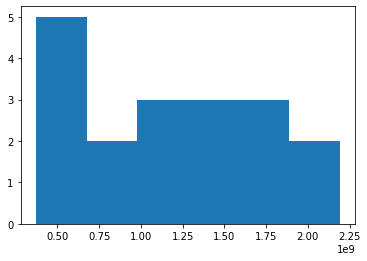

In [363]:
plt.hist(station_totals['DAILY_ENTRIES'],bins=6)

(array([27031., 14985., 12718., 10714.,  7739.,  6020.,  4893.,  4061.,
         3250.,  3014.,  2648.,  1857.,  1465.,  1033.,   746.,   882.,
          955.,   656.,   591.,   369.]),
 array([     0. ,  49997.6,  99995.2, 149992.8, 199990.4, 249988. ,
        299985.6, 349983.2, 399980.8, 449978.4, 499976. , 549973.6,
        599971.2, 649968.8, 699966.4, 749964. , 799961.6, 849959.2,
        899956.8, 949954.4, 999952. ]),
 <BarContainer object of 20 artists>)

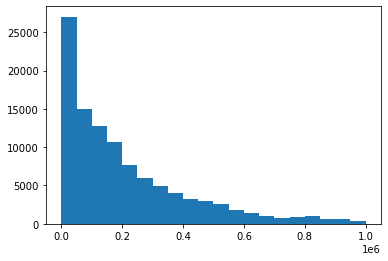

In [364]:
plt.hist(turnstiles_daily.DAILY_ENTRIES, bins=20)

## Graphical Data Exploration

##### This full view is interesting. We can see a clear dip after 2019-01 that is only further exacerbated at the onstart of the pandemic (2020-02). We know that the constustion of the tunnel of the L was completed in 2020-04, but month over month is doesn't appear to see marked increase in daily ridership.  Let's try some Month vs Month Comparisons. I wonder If there are differences year over year with days of the week. Would there be marked increase with different days of the week impacting 

In [365]:
station_daily.dtypes

STATION             object
DATE                object
MONTHYEAR        period[M]
MONTH                int64
YEAR                 int64
WEEK                 int64
WEEKDAY             object
DAILY_ENTRIES      float64
dtype: object

In [366]:
riderspermonth= station_daily.groupby("MONTHYEAR").DAILY_ENTRIES.mean()

In [367]:
riderspermonth

MONTHYEAR
2019-01    1.790107e+06
2019-02    1.749778e+06
2019-03    1.776310e+06
2019-04    1.816360e+06
2019-05    1.721943e+06
2019-06    1.696355e+06
2019-07    1.659557e+06
2019-08    1.284328e+06
2019-09    1.087774e+06
2019-10    9.867476e+05
2019-11    9.020021e+05
2019-12    8.088236e+05
2020-01    1.752203e+06
2020-02    1.708491e+06
2020-03    1.688954e+06
2020-04    1.627034e+06
2020-05    1.606724e+06
2020-06    1.555440e+06
2020-07    1.471209e+06
2020-08    1.279193e+06
2020-09    1.089055e+06
2020-10    9.880405e+05
2020-11    9.034304e+05
2020-12    8.107204e+05
2021-01    9.115688e+05
2021-02    8.678602e+05
2021-03    8.477613e+05
2021-04    8.799613e+05
2021-05    8.375257e+05
2021-06    8.453968e+05
2021-07    8.609925e+05
Freq: M, Name: DAILY_ENTRIES, dtype: float64

In [368]:
ridersperYear= station_daily.groupby("YEAR").DAILY_ENTRIES.sum()

In [369]:
ridersperYear

YEAR
2019    9.388192e+09
2020    9.029823e+09
2021    3.298574e+09
Name: DAILY_ENTRIES, dtype: float64

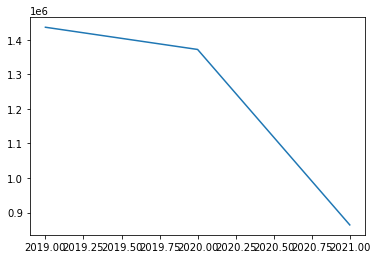

In [370]:
plt.plot(station_daily.groupby("YEAR").DAILY_ENTRIES.mean())

#### This is mildly alarming... why would I see such a percipitous drop here? Ah. Wait... we are missing a full 5 months of data. Let's Make this comparison of smilar time periods and see what we get.

In [371]:
timemask = (station_daily.MONTH<7) & (station_daily.MONTH>3)
station_daily = station_daily[timemask]

In [372]:
timemask.value_counts()

False    12030
True      4903
Name: MONTH, dtype: int64

In [373]:
station_daily.MONTHYEAR.value_counts()

2020-05    558
2021-05    558
2019-05    555
2020-06    540
2021-06    540
2021-04    540
2019-06    539
2020-04    537
2019-04    536
Freq: M, Name: MONTHYEAR, dtype: int64

In [374]:
riderspermonth= station_daily.groupby("MONTHYEAR").DAILY_ENTRIES.mean()

In [375]:
riderspermonth

MONTHYEAR
2019-04    1.816360e+06
2019-05    1.721943e+06
2019-06    1.696355e+06
2020-04    1.627034e+06
2020-05    1.606724e+06
2020-06    1.555440e+06
2021-04    8.799613e+05
2021-05    8.375257e+05
2021-06    8.453968e+05
Freq: M, Name: DAILY_ENTRIES, dtype: float64

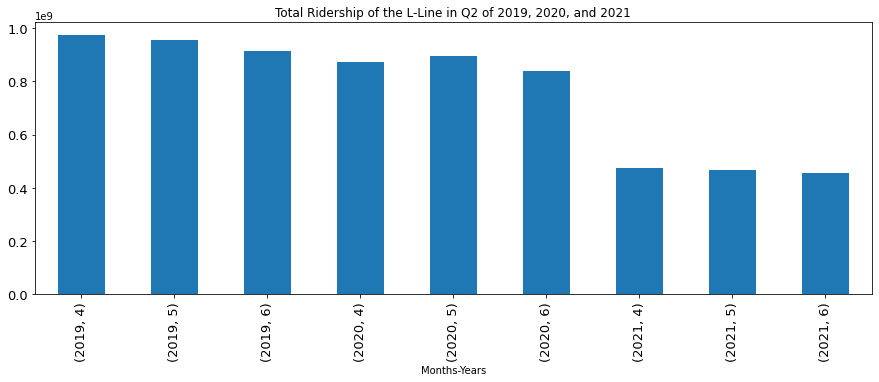

In [404]:
riderspermonth2= station_daily.groupby(["YEAR","MONTH"]).DAILY_ENTRIES.sum()
a= riderspermonth2.plot.bar(title = "Total Ridership of the L-Line in Q2 of 2019, 2020, and 2021",fontsize = "13",figsize = (15,5), xlabel = "Months-Years")
plt.savefig('Ridershipp Graph Month over Month')

In [409]:
station_daily_weekday_year=station_daily.groupby(["WEEKDAY","YEAR"]).DAILY_ENTRIES.mean()

In [410]:
turnstiles_daily_weekday_year

WEEKDAY    YEAR
Friday     2019    310218.154440
           2020    260440.857143
           2021    120093.659255
Monday     2019    311595.037319
           2020    260208.468011
           2021    119776.072716
Saturday   2019    309802.448591
           2020    259296.288904
           2021    120356.567308
Sunday     2019    309775.398324
           2020    257477.766061
           2021    120116.931490
Thursday   2019    311049.917178
           2020    261870.152768
           2021    121035.067308
Tuesday    2019    311616.947207
           2020    259617.797924
           2021    119499.727163
Wednesday  2019    311600.851994
           2020    263899.685433
           2021    119886.827524
Name: DAILY_ENTRIES, dtype: float64

<AxesSubplot:title={'center':'Average Ridership of the L-Line in Q2 of 2019, 2020, and 2021 by Week Day'}, xlabel='WeekDay-Years'>

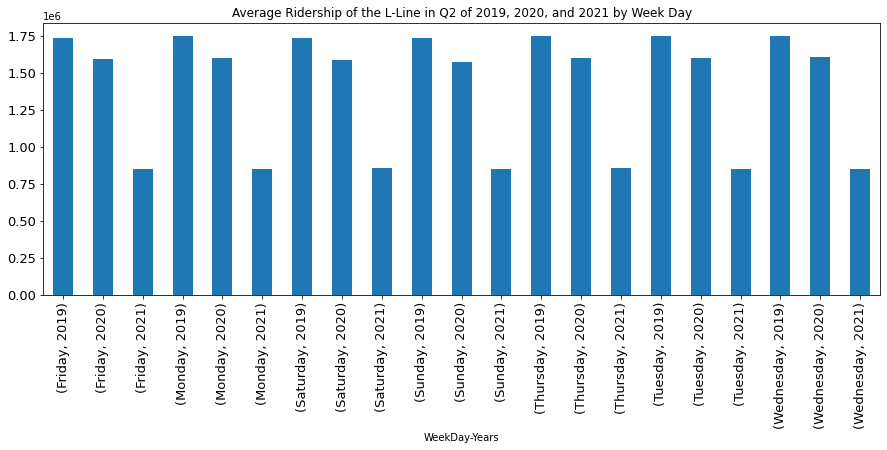

In [411]:
station_daily_weekday_year.plot.bar(title = "Average Ridership of the L-Line in Q2 of 2019, 2020, and 2021 by Week Day",fontsize = "13",figsize = (15,5), xlabel = "WeekDay-Years")

In [380]:
plot(riderspermontg)

NameError: name 'plot' is not defined

## This is intersting. It appears that despite finishing constuction, L train ridership has been steadily decreasing across the board. Is there a station in particular we can point to?

In [381]:
station_totals = station_daily_small.groupby('STATION').sum()\
    .sort_values('DAILY_ENTRIES', ascending=False)\
    .reset_index()

station_totals.head(20)

,STATION,DAILY_ENTRIES
0,1 AV,2.193838e+09
1,BEDFORD AV,1.903559e+09
2,DEKALB AV,1.843710e+09
3,HALSEY ST,1.722262e+09
4,CANARSIE-ROCKAW,1.641468e+09
5,JEFFERSON ST,1.580379e+09
6,GRAHAM AV,1.576837e+09
7,GRAND ST,1.309052e+09
8,MONTROSE AV,1.256190e+09
9,MORGAN AV,1.246225e+09


<BarContainer object of 18 artists>

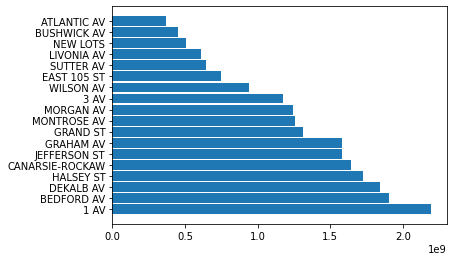

In [422]:
plt.barh(y=station_totals["STATION"], width =station_totals['DAILY_ENTRIES'],height = .9)

<AxesSubplot:>

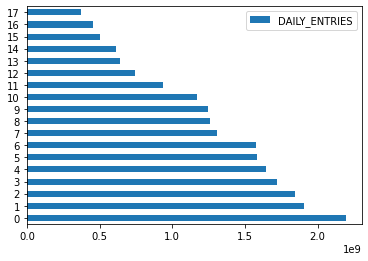

In [421]:
station_totals.plot.barh()

## How Does Thi change YoY deviate from this?

In [383]:
s20 = station_daily[station_daily.YEAR==2020]
s20_totals = sN21.groupby('STATION').sum()\
    .sort_values('DAILY_ENTRIES', ascending=False)\
    .reset_index()

s20_totals.head(20)

,STATION,MONTH,YEAR,WEEK,DAILY_ENTRIES
0,BEDFORD AV,910,367549,3666,567092829.0
1,1 AV,910,367549,3666,487951069.0
2,DEKALB AV,891,359473,3594,438577627.0
3,GRAHAM AV,910,367549,3666,434614475.0
4,CANARSIE-ROCKAW,892,359470,3601,413650763.0
5,HALSEY ST,910,367549,3666,392857175.0
6,JEFFERSON ST,910,367549,3666,361960103.0
7,MONTROSE AV,910,367549,3666,355593417.0
8,GRAND ST,910,367549,3666,349004815.0
9,3 AV,910,367549,3666,309857124.0


In [384]:
s19 = station_daily[station_daily.YEAR==2019]
s19_totals = s19.groupby('STATION').sum()\
    .sort_values('DAILY_ENTRIES', ascending=False)\
    .reset_index()

s19_totals.head(20)

,STATION,MONTH,YEAR,WEEK,DAILY_ENTRIES
0,BEDFORD AV,455,183729,1820,273544993.0
1,CANARSIE-ROCKAW,449,181710,1797,250243788.0
2,1 AV,455,183729,1820,244004172.0
3,GRAHAM AV,455,183729,1820,228667780.0
4,HALSEY ST,455,183729,1820,222904868.0
5,MONTROSE AV,455,183729,1820,206994624.0
6,GRAND ST,455,183729,1820,204952662.0
7,DEKALB AV,436,175653,1748,193353598.0
8,3 AV,455,183729,1820,179940843.0
9,JEFFERSON ST,455,183729,1820,154297333.0


<BarContainer object of 1638 artists>

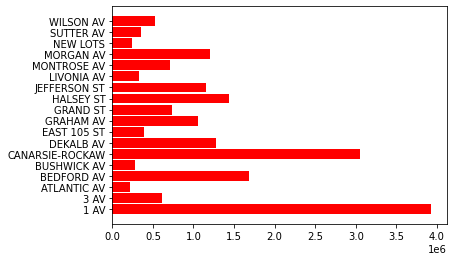

In [385]:
plt.barh(y=s21["STATION"], width =s21['DAILY_ENTRIES'],height = .9, color = "r")

<BarContainer object of 1635 artists>

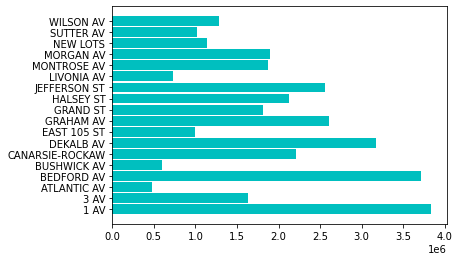

In [386]:

plt.barh(y=s20["STATION"], width =s20['DAILY_ENTRIES'],height = .9, color = "c")

<BarContainer object of 1630 artists>

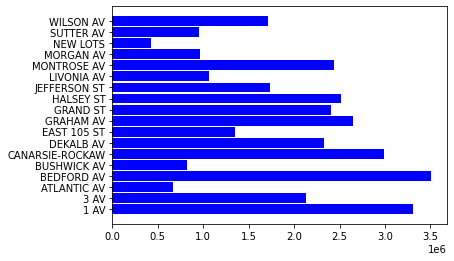

In [387]:
plt.barh(y=s19["STATION"], width =s19['DAILY_ENTRIES'],height = .9, color = "b")

[Text(0.5, 1.0, 'L-Line Total Ridership by Station')]

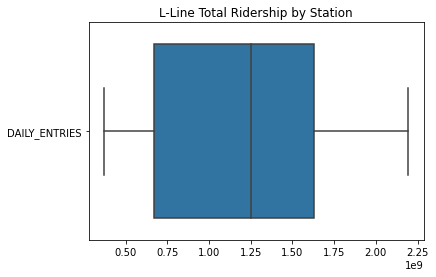

In [388]:
sns.boxplot(data=station_totals_small, orient = "h").set(title = "L-Line Total Ridership by Station")

In [429]:
station_daily_small = turnstiles_daily.groupby(["STATION", "DATE"])[['DAILY_ENTRIES']].sum().reset_index()
station_daily_small.head()

,STATION,DATE,DAILY_ENTRIES
0,1 AV,01/01/2020,850309.0
1,1 AV,01/01/2021,2320225.0
2,1 AV,01/02/2019,2114376.0
3,1 AV,01/02/2020,1446249.0
4,1 AV,01/02/2021,2306916.0


In [ ]:
import numpy as np

In [430]:
station_daily_1Ave= station_daily_small[station_daily_small['STATION'] == '1 AV']
station_daily_1Ave.head(15)

,STATION,DATE,DAILY_ENTRIES
0,1 AV,01/01/2020,850309.0
1,1 AV,01/01/2021,2320225.0
2,1 AV,01/02/2019,2114376.0
3,1 AV,01/02/2020,1446249.0
4,1 AV,01/02/2021,2306916.0
5,1 AV,01/03/2019,2110813.0
6,1 AV,01/03/2020,1441943.0
7,1 AV,01/03/2021,2290707.0
8,1 AV,01/04/2019,2106603.0
9,1 AV,01/04/2020,1441303.0


In [445]:
station_daily_1Ave['WEEKDAY'] = pd.to_datetime(station_daily_1Ave['DATE']).dt.day_name()
station_daily_1Ave['WEEK_OF_YEAR'] = pd.to_datetime(station_daily_1Ave['DATE']).dt.week
station_daily_1Ave['YEAR'] = pd.to_datetime(station_daily_1Ave['DATE']).dt.year
station_daily_1Ave['MONTH'] = pd.to_datetime(station_daily_1Ave['DATE']).dt.month
station_daily_1Ave.head(15)

<ipython-input-445-d2355af8565b>:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  station_daily_1Ave['WEEK_OF_YEAR'] = pd.to_datetime(station_daily_1Ave['DATE']).dt.week


,STATION,DATE,DAILY_ENTRIES,DAY_OF_WEEK_NUM,WEEK_OF_YEAR,WEEKDAY,YEAR,MONTH
1,1 AV,01/01/2021,2320225.0,Friday,53,Friday,2021,1
4,1 AV,01/02/2021,2306916.0,Saturday,53,Saturday,2021,1
7,1 AV,01/03/2021,2290707.0,Sunday,53,Sunday,2021,1
10,1 AV,01/04/2021,2286530.0,Monday,1,Monday,2021,1
13,1 AV,01/05/2021,2283631.0,Tuesday,1,Tuesday,2021,1
16,1 AV,01/06/2021,2269977.0,Wednesday,1,Wednesday,2021,1
19,1 AV,01/07/2021,2255405.0,Thursday,1,Thursday,2021,1
22,1 AV,01/08/2021,2240151.0,Friday,1,Friday,2021,1
25,1 AV,01/09/2021,2223126.0,Saturday,1,Saturday,2021,1
28,1 AV,01/10/2021,2205142.0,Sunday,1,Sunday,2021,1


In [446]:
timemask1ave = (station_daily_1Ave.MONTH<7) & (station_daily_1Ave.MONTH>3)
station_daily_1Ave = station_daily_1Ave[timemask1ave]

In [441]:
station_daily_1Ave= station_daily_1Ave[station_daily_1Ave['YEAR'] == 2021]

Text(0.5, 1.0, 'Daily Entries for 1Ave')

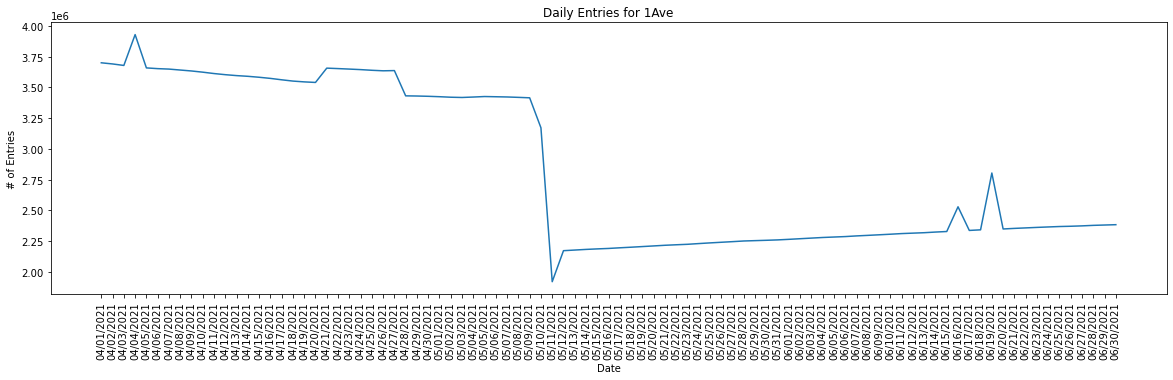

In [450]:
plt.figure(figsize=(20,5))
plt.plot(station_daily_1Ave['DATE'], station_daily_1Ave['DAILY_ENTRIES'])
plt.ylabel('# of Entries')
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.title('Daily Entries for 1Ave')

In [452]:
station_daily_WAve= station_daily_small[station_daily_small['STATION'] == 'WILSON AV']
station_daily_WAve.head(15)

,STATION,DATE,DAILY_ENTRIES
15991,WILSON AV,01/01/2020,1313789.0
15992,WILSON AV,01/01/2021,587414.0
15993,WILSON AV,01/02/2019,1897102.0
15994,WILSON AV,01/02/2020,1313729.0
15995,WILSON AV,01/02/2021,584357.0
15996,WILSON AV,01/03/2019,1893839.0
15997,WILSON AV,01/03/2020,1313725.0
15998,WILSON AV,01/03/2021,580855.0
15999,WILSON AV,01/04/2019,1890138.0
16000,WILSON AV,01/04/2020,1311720.0


In [453]:
station_daily_WAve['WEEKDAY'] = pd.to_datetime(station_daily_WAve['DATE']).dt.day_name()
station_daily_WAve['WEEK_OF_YEAR'] = pd.to_datetime(station_daily_WAve['DATE']).dt.week
station_daily_WAve['YEAR'] = pd.to_datetime(station_daily_WAve['DATE']).dt.year
station_daily_WAve['MONTH'] = pd.to_datetime(station_daily_WAve['DATE']).dt.month
station_daily_WAve.head(15)

<ipython-input-453-a12243cff154>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station_daily_WAve['WEEKDAY'] = pd.to_datetime(station_daily_WAve['DATE']).dt.day_name()
<ipython-input-453-a12243cff154>:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  station_daily_WAve['WEEK_OF_YEAR'] = pd.to_datetime(station_daily_WAve['DATE']).dt.week
<ipython-input-453-a12243cff154>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  statio

,STATION,DATE,DAILY_ENTRIES,WEEKDAY,WEEK_OF_YEAR,YEAR,MONTH
15991,WILSON AV,01/01/2020,1313789.0,Wednesday,1,2020,1
15992,WILSON AV,01/01/2021,587414.0,Friday,53,2021,1
15993,WILSON AV,01/02/2019,1897102.0,Wednesday,1,2019,1
15994,WILSON AV,01/02/2020,1313729.0,Thursday,1,2020,1
15995,WILSON AV,01/02/2021,584357.0,Saturday,53,2021,1
15996,WILSON AV,01/03/2019,1893839.0,Thursday,1,2019,1
15997,WILSON AV,01/03/2020,1313725.0,Friday,1,2020,1
15998,WILSON AV,01/03/2021,580855.0,Sunday,53,2021,1
15999,WILSON AV,01/04/2019,1890138.0,Friday,1,2019,1
16000,WILSON AV,01/04/2020,1311720.0,Saturday,1,2020,1


In [454]:
timemaskWave = (station_daily_WAve.MONTH<7) & (station_daily_WAve.MONTH>3)
station_daily_WAve = station_daily_WAve[timemaskWave]

In [455]:
station_daily_WAve= station_daily_WAve[station_daily_WAve['YEAR'] == 2021]

Text(0.5, 1.0, 'Daily Entries for Wilson Ave')

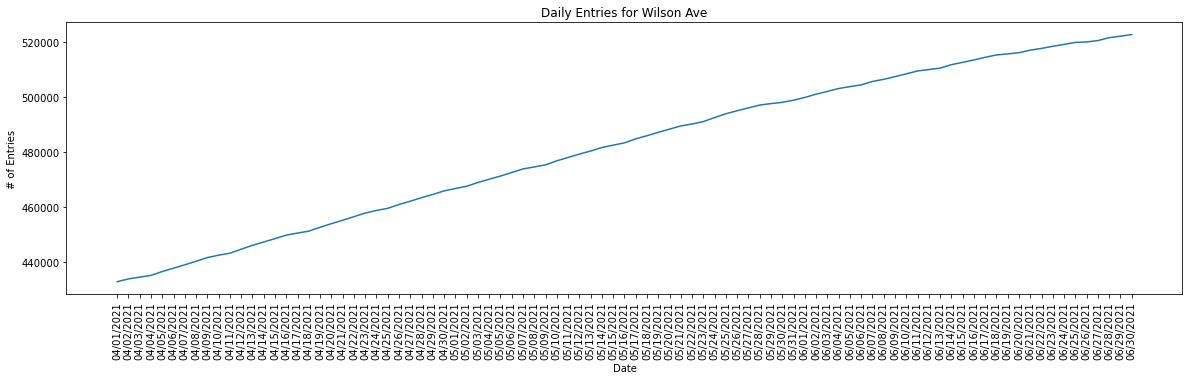

In [456]:
plt.figure(figsize=(20,5))
plt.plot(station_daily_WAve['DATE'], station_daily_WAve['DAILY_ENTRIES'])
plt.ylabel('# of Entries')
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.title('Daily Entries for Wilson Ave')